In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables

inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
engine.execute('SELECT * FROM measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01')

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [13]:

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
data = pd.read_sql("SELECT prcp, date FROM measurement WHERE date BETWEEN \
                        date('2016-08-23') AND date('2017-08-23')", conn)


print(data)






      prcp        date
0     0.00  2016-08-23
1     0.08  2016-08-24
2     0.08  2016-08-25
3     0.00  2016-08-26
4     0.00  2016-08-27
...    ...         ...
2225  0.09  2017-08-19
2226   NaN  2017-08-20
2227  0.56  2017-08-21
2228  0.50  2017-08-22
2229  0.45  2017-08-23

[2230 rows x 2 columns]


In [14]:

data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [15]:

# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date

data.set_index(['date'], inplace = True)
data.sort_index(ascending=True)
data



,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56


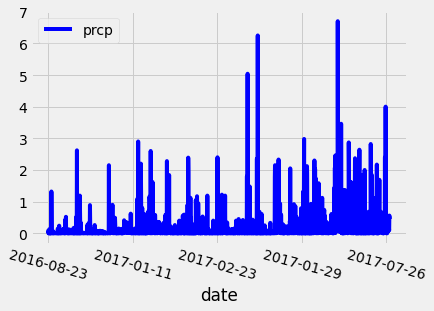

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
data.plot(use_index=True, y='prcp', color='blue')
plt.xticks(rotation = 345)
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data


precip_mean = data["prcp"].mean()
precip_median = data["prcp"].median()
precip_mode = data["prcp"].mode()

print(f"Here is the mean: {precip_mean}, median: {precip_median}, and mode: {precip_mode}.")




Here is the mean: 0.17727857496288996, median: 0.02, and mode: 0    0.0
dtype: float64.


In [18]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Station Analysis

In [19]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [20]:
# Design a query to calculate the total number stations in the dataset
# session.query(station.id).order_by(station.id.desc()).first()

session.query(station.id).count()

9

In [21]:
from sqlalchemy import desc

In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(measurement.station, func.count(measurement.date).label('count')). \
    group_by(measurement.station).order_by(desc('count')).all()



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
from sqlalchemy.sql import func


# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
highest_temp = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    order_by(measurement.tobs.desc()).first()
              
lowest_temp = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    order_by(measurement.tobs.asc()).first()   

average_temp = session.query(func.round(func.avg(measurement.tobs))).\
    filter(measurement.station == 'USC00519281').all()

print(f"The highest temperature for station USC00519281 is {highest_temp}. The lowest temperature is {lowest_temp} and the average temperature is {average_temp}.")
                                               

The highest temperature for station USC00519281 is (85.0,). The lowest temperature is (54.0,) and the average temperature is [(72.0,)].


In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


temp_data = pd.read_sql("SELECT tobs, date, station FROM measurement WHERE date BETWEEN \
                        date('2016-08-23') AND date('2017-08-23')", conn)


           
USC005191281_temp= temp_data[(temp_data["station"]=="USC00519281")]
USC005191281_temp


,tobs,date,station
1529,77.0,2016-08-23,USC00519281
1530,77.0,2016-08-24,USC00519281
1531,80.0,2016-08-25,USC00519281
1532,80.0,2016-08-26,USC00519281
1533,75.0,2016-08-27,USC00519281
...,...,...,...
1876,77.0,2017-08-14,USC00519281
1877,77.0,2017-08-15,USC00519281
1878,76.0,2017-08-16,USC00519281
1879,76.0,2017-08-17,USC00519281


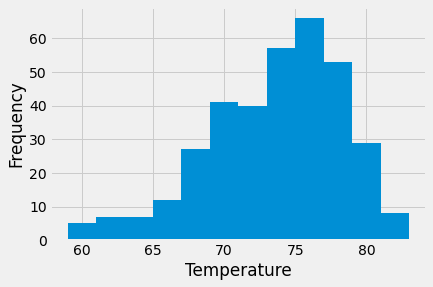

In [25]:
x = USC005191281_temp['tobs']
plt.hist(x, bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close session

In [26]:
# Close Session
session.close()